# Perceptron algorithm

In [1]:
def weighted_sum(xs, ws):   
    return sum([xs[i]*ws[i] for i in range(len(xs))])
    

def perceptron(xs, ds, weights, threshold=0.5, a=0.1, verbose=False):
    """
    Single perceptron algorithm
    
    xs: list/tuple
        List or tuple of shape (x11, x12,...,x1n), (x21, x22,...,x2n), ...
        (xm1, xm2,...,xmn) where the xn are features.
         
    ds: list/tuple
        List or tuple of shape (d1, d2,...,dm) where the dm are the labels
        for the features (xm1, xm2,...,xmn). 
    
    weights: list/tuple
        List or tuple of shape (w1, w2,...,wn) where the wn are the initial
        weights for each of the n features.
        
    threshold: float, default 0.5
        Threshold for the stepwise function which is used as activation fu-
        nction. 
    
    a: float
        Learning ratio.
    
    Returns a tuple containing the weights for the perceptron. 
    """
    
    #Storage the weights
    Ws = [weights]
    
    #Number of features
    nf = len(weights)
    
    while True:
        #Counting the errors for each iteration, if equals 0, then
        #the algorithm spots
        err_count = 0
        
        for row, d in zip(xs, ds):
            #Weighted sum of the features in each row
            ws = []
            z = weighted_sum(row, Ws[-1])
            
            #Appliying stepwise activation function
            if z<threshold: y = 0 
            else: y = 1
            
            #updating weights  by using w_new = w_old + a(d-y)x_j and
            #counting the number of errors (bad classifications) with
            #the new weights
            for j in range(nf):
                ws.append(Ws[-1][j] + a*(d - y)*row[j])
                err_count += abs(d-y)

            Ws.append(ws)
            
            if verbose: print(ws)
        if verbose: print("-"*len(f"{ws}"))
            
        if err_count==0: return Ws
        
        
def proof_perceptron(xs, ds, weights, threshold=0.5):
    """
    Prints a table with the features, labels and results obtained for the
    perceptron when using "weights".
    
    xs: list/tuple
        List or tuple of shape (x11, x12,...,x1n), (x21, x22,...,x2n), ...
        (xm1, xm2,...,xmn) where the xn are the n features.
         
    ds: list/tuple
        List or tuple of shape (d1, d2,...,dm) where the dm are the labels
        for the features (xm1, xm2,...,xmn). 
    
    weights: list/tuple
        List or tuple of shape (w1, w2,...,wn) where the wn are the initial
        weights for each of the n features.
        
    threshold: float, default 0.5
        Threshold for the stepwise function which is used as activation fu-
        nction. 
    """
    
    title = ""
    for i in range(len(xs[0])):
        title += f"x_{i+1}\t"
        
    title += "d\ty"
    print(title)
    
    for row, d in zip(xs, ds):
        z = weighted_sum(row, weights)
            
        #Appliying stepwise activation function
        if z<threshold: y = 0 
        else:y = 1
            
        line = ""
        for i in range(len(weights)):
            line+=f" {row[i]}\t"
        line+=f"{d}\t{y}"
            
        print(line)

# Proofs

The & function

In [2]:
xs_and  = (1,1), (1,0), (0,1), (0,0)
ds_and  = 1,0,0,0
ws_and0 = 0,0

In [3]:
ws_and = perceptron(xs=xs_and, ds=ds_and, weights=ws_and0)[-1]
ws_and

[0.30000000000000004, 0.30000000000000004]

In [4]:
proof_perceptron(xs=xs_and, ds=ds_and, weights=ws_and)

x_1	x_2	d	y
 1	 1	1	1
 1	 0	0	0
 0	 1	0	0
 0	 0	0	0


NAND function

In [5]:
xs_NAND  = (1,0,0), (1,0,1), (1,1,0), (1,1,1)
ds_NAND  = 1,1,1,0
ws_NAND0 = 0,0,0

In [6]:
ws_NAND = perceptron(xs=xs_NAND, ds=ds_NAND, weights=ws_NAND0)[-1]
ws_NAND

[0.7999999999999999, -0.2, -0.1]

In [7]:
proof_perceptron(xs=xs_NAND, ds=ds_NAND, weights=ws_NAND)

x_1	x_2	x_3	d	y
 1	 0	 0	1	1
 1	 0	 1	1	1
 1	 1	 0	1	1
 1	 1	 1	0	0


Classification problem

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Centers for the bubbles
center_1 = (0, 0)
center_2 = (1.5,1.5)
N = 1000

#Labels
labels_1 = (0,)*N
labels_2 = (1,)*N

#seed
np.random.seed(123459467)

#First bubble
x1y1 = np.random.normal(loc=center_1, scale=0.3, size=(N,len(center_1)))

#Second bubble
x2y2 = np.random.normal(loc=center_2, scale=0.3, size=(N,len(center_2)))


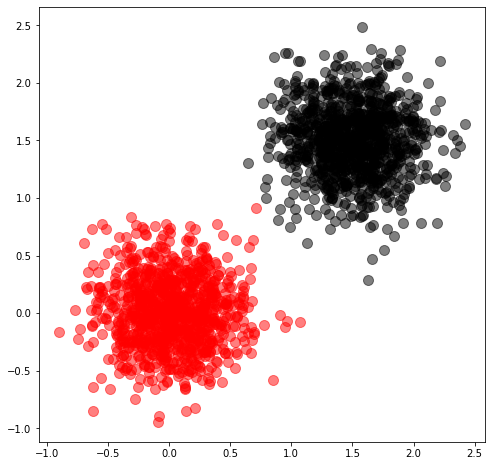

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=x1y1[:,0], y=x1y1[:,1], c="red",   s=100, alpha=0.5)
ax.scatter(x=x2y2[:,0], y=x2y2[:,1], c="black", s=100, alpha=0.5)
plt.show()

In [18]:
ws_bubbles0 = 0, 0
ws_bubbles = perceptron(xs=np.concatenate((x1y1, x2y2)),
                        ds=np.concatenate((labels_1, labels_2)),
                        weights=ws_bubbles0)
ws_bubbles[-1]

[0.33487528542171585, 0.25167135696842224]

In [19]:
proof_perceptron(xs=np.concatenate((x1y1, x2y2)),
                 ds=np.concatenate((labels_1, labels_2)),
                 weights=ws_bubbles[-1])

x_1	x_2	d	y
 0.22591705881802618	 -0.34472601477814885	0	0
 -0.07458497225619767	 0.03508580693593088	0	0
 0.32369684838850454	 -0.3698636528445505	0	0
 -0.11006008938254663	 -0.2971182306714991	0	0
 -0.23800504831927854	 0.07255672117564847	0	0
 -0.15436109092577813	 -0.002849897598289128	0	0
 -0.5738642265521643	 0.2155660035585649	0	0
 0.04925734705625789	 -0.19325636280034772	0	0
 -0.3230784515868689	 0.4687324062787939	0	0
 0.2607040490547168	 0.5187324135863994	0	0
 0.09766141401842705	 0.33728034536067586	0	0
 0.2267694045808496	 -0.10238278116154406	0	0
 -0.2750560811518703	 -0.48163723815262593	0	0
 0.2393910093502029	 0.13906129363895245	0	0
 -0.07746241858171961	 0.19798240250655283	0	0
 0.1387409635389855	 0.4544721590680138	0	0
 0.2681643355989863	 0.021435031921229055	0	0
 -0.349544703094489	 -0.25148252816090305	0	0
 -0.0059640552223657805	 -0.09014806241300491	0	0
 -0.74931047322427	 -0.22332344753685623	0	0
 0.2997413089646028	 0.015634435164807555	0	0
 0.2686790827919

 2.0282409614020906	 1.3935452766222272	1	1
 1.20012180175988	 0.8546866138353036	1	1
 1.1136561751225071	 1.3729095772300637	1	1
 1.4475691047253798	 1.436145932185694	1	1
 1.543158360381015	 1.2474804629166227	1	1
 1.261329609765101	 1.436349982971683	1	1
 1.0652240215426623	 1.4670047839349802	1	1
 1.9954515248111633	 1.7877557877457715	1	1
 1.514616530977892	 1.0766163212463524	1	1
 1.7669662810172628	 1.0445608905991501	1	1
 1.4598898328579968	 1.3473499363081345	1	1
 1.0299381648542587	 1.3671601810834872	1	1
 1.4624709536703626	 1.704656732166192	1	1
 1.2917617046622392	 0.9922480448811978	1	1
 1.6676364953065081	 1.835260200897744	1	1
 1.4084483432193178	 1.323425857374604	1	1
 1.776057758719587	 0.9822310755946673	1	1
 1.295948592813613	 1.4532488702390098	1	1
 1.526950411281562	 1.8041396312199414	1	1
 0.8291354457809564	 1.6628283692288162	1	1
 1.1109095950192103	 1.0991539727674462	1	1
 1.538295474013437	 1.573246772267754	1	1
 1.6819139995518477	 1.9714621317246017	1	1
 1.

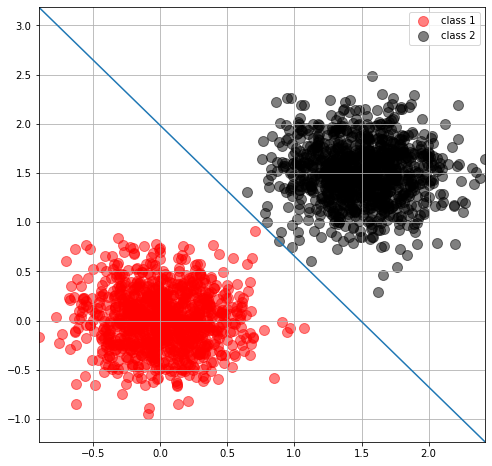

In [20]:
fig, ax = plt.subplots(figsize=(8,8))

xs = np.linspace(min(np.concatenate((x1y1[:,0],x2y2[:,0]))), max(np.concatenate((x1y1[:,0],x2y2[:,0]))))
ys = (0.5 - xs*ws_bubbles[-1][0])/ws_bubbles[-1][1]

ax.scatter(x=x1y1[:,0], y=x1y1[:,1], c="red",   s=100, alpha=0.5, label="class 1")
ax.scatter(x=x2y2[:,0], y=x2y2[:,1], c="black", s=100, alpha=0.5, label="class 2")

ax.set_xlim(min(xs), max(xs))
ax.set_ylim(min(ys), max(ys))
ax.legend()
plt.plot(xs, ys)
plt.grid()

plt.show()